In [1]:
import pandas as pd
import copy
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
斐波那契数列　直接递归算法
"""
def arrayComputer(n):
    if n <= 2:
        return 1
    else:
        prevA = arrayComputer(n-1)
        prevprevA = arrayComputer(n-2)
    return prevA + prevprevA

In [3]:
"""
直接递归算法　计算前３４项
"""
for n in range(1,35):
    print n, arrayComputer(n)

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887


In [4]:
"""
斐波那契数列　线性模型算法
"""

def linearComputer(n):
    if n <= 2:
        return 1    
    current2A = [1, 1]
    prev2A = copy.deepcopy(current2A)
    for ind in range(n-2):
        current2A[0] = 0*prev2A[0] + 1*prev2A[1]
        current2A[1] = 1*prev2A[0] + 1*prev2A[1]
        prev2A = copy.deepcopy(current2A)
    return prev2A[1]
    

In [5]:
"""
线性模型算法　计算前１００项
"""

for n in range(1,100):
    print n, linearComputer(n)

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887
35 9227465
36 14930352
37 24157817
38 39088169
39 63245986
40 102334155
41 165580141
42 267914296
43 433494437
44 701408733
45 1134903170
46 1836311903
47 2971215073
48 4807526976
49 7778742049
50 12586269025
51 20365011074
52 32951280099
53 53316291173
54 86267571272
55 139583862445
56 225851433717
57 365435296162
58 591286729879
59 956722026041
60 1548008755920
61 2504730781961
62 4052739537881
63 6557470319842
64 10610209857723
65 17167680177565
66 27777890035288
67 44945570212853
68 72723460248141
69 117669030460994
70 190392490709135
71 308061521170129
72 498454011879264
73 806515533049393
74 1304969544928657
75 2111485077978050
76 3416454622906707
77 5527939700884757
78 8944394323791464
79 14472334024676221
80 23416728348467685

In [6]:
"""
矩阵的基本变换
"""

def linearTransform(df, xlambda, ylambda, theta):
    transformMatrix = pd.DataFrame({'x':[1,0],'y':[0,1]}, index = ['x','y'])
    transformMatrix.loc['x','x'] = np.cos(theta)
    transformMatrix.loc['y','y'] = np.cos(theta)
    transformMatrix.loc['x','y'] = -np.sin(theta)
    transformMatrix.loc['y','x'] = np.sin(theta)
    transformMatrix['x'] *= xlambda
    transformMatrix['y'] *= ylambda
    df_trans = df.copy().T
    df_trans = transformMatrix.dot(df_trans)
    return df_trans.T



In [7]:
"""
准备基本数据
"""
x_coor1 = [np.cos(np.pi/100*ind) for ind in range(200)]
y_coor1 = [np.sin(np.pi/100*ind) for ind in range(200)]
df1 = pd.DataFrame({'x':x_coor1, 'y':y_coor1})

x_coor2 = [0.5+0.5*np.cos(np.pi/50*ind) for ind in range(100)]
y_coor2 = [0.5*np.sin(np.pi/50*ind) for ind in range(100)]
df2 = pd.DataFrame({'x':x_coor2, 'y':y_coor2})

x_coor3 = [-1+2.0/100*ind for ind in range(100)]
y_coor3 = [-1+2.0/100*ind for ind in range(100)]
df3 = pd.DataFrame({'x':x_coor3, 'y':y_coor3})


df = df1.append(df2).append(df3)

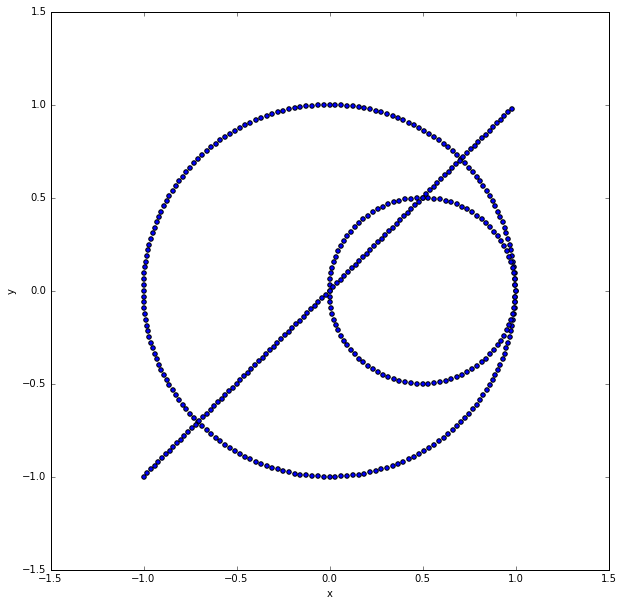

In [8]:
"""
基本数据画图
"""
df.plot(x='x',y='y',kind='scatter',figsize = [10,10])

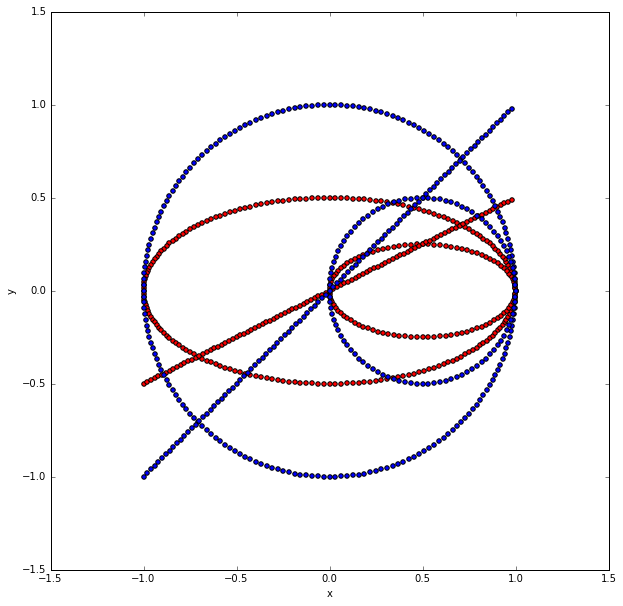

In [9]:
"""
拉伸变换
"""
df_trans = linearTransform(df, 1, 0.5, 0)
ax=df_trans.plot(x='x',y='y',kind='scatter',figsize = [10,10],color='r')
df.plot(x='x',y='y',kind='scatter',figsize = [10,10], ax=ax)

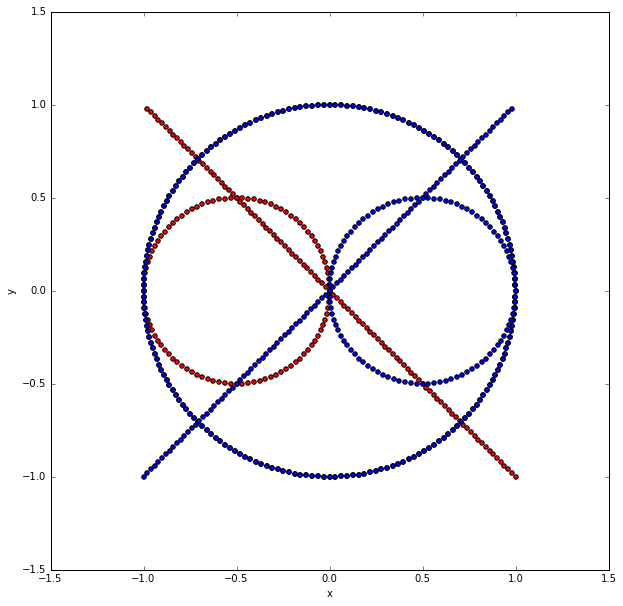

In [10]:
"""
翻转变换
"""
df_trans = linearTransform(df, -1, 1, 0)
ax=df_trans.plot(x='x',y='y',kind='scatter',figsize = [10,10],color='r')
df.plot(x='x',y='y',kind='scatter',figsize = [10,10], ax=ax)

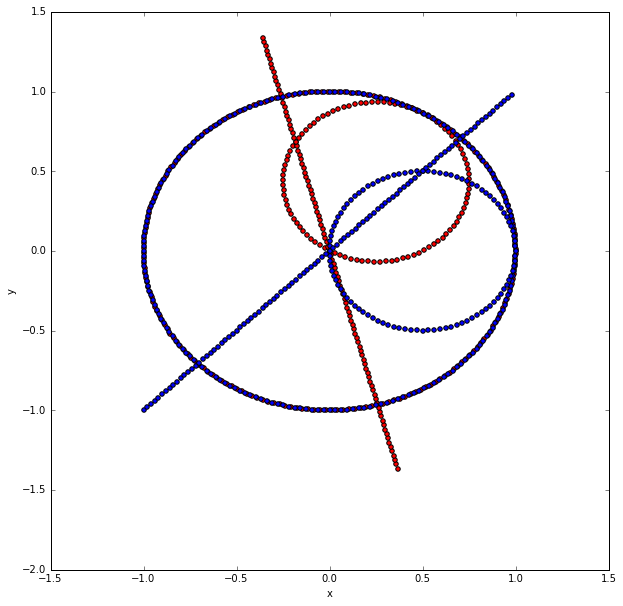

In [11]:
"""
旋转
"""
df_trans = linearTransform(df, 1, 1, np.pi/3)
ax=df_trans.plot(x='x',y='y',kind='scatter',figsize = [10,10],color='r')
df.plot(x='x',y='y',kind='scatter',figsize = [10,10], ax=ax)


In [12]:
"""
斐波那契数列　线性模型算法
"""

def linearRecorder(n):
    df = pd.DataFrame({'current':[1],'next':[1]},index=[1])
    num = 1
    if n <= 2:
        return 1    
    current2A = [1, 1]
    prev2A = copy.deepcopy(current2A)
    for ind in range(n-2):
        current2A[0] = 0*prev2A[0] + 1*prev2A[1]
        current2A[1] = 1*prev2A[0] + 1*prev2A[1]
        prev2A = copy.deepcopy(current2A)
        num += 1
        df.loc[num,:] = prev2A
    return df

In [13]:
ind = 3

3


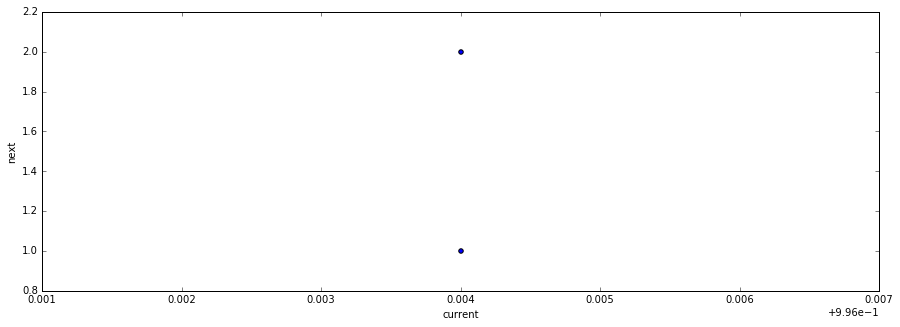

In [14]:
linearRecorder(ind).plot(x='current', y ='next',kind='scatter',figsize = [15,5])
print ind
ind += 1


In [15]:
pd.DataFrame({'x':[1],'y':[1]},index=[1])

,x,y
1,1,1
